In [7]:
from sklearn.datasets import fetch_california_housing # Import the California housing dataset from scikit-learn
import pandas as pd #Import pandas for data manipulation and analysis

X, y = fetch_california_housing(as_frame=True, return_X_y=True) # Load the California housing dataset
    # 'as_frame=True' returns the data as a pandas DataFrame
    # 'return_X_y=True' splits the dataset into features (X) and target (y)

In [8]:
X = X[:10000]  # Select only the first 10,000 rows from the features (X) for quicker processing or sampling
y = y[:10000]  #Select the corresponding first 10,000 rows from the target (y)

In [9]:
X.head()  #Display the first 5 rows of the features DataFrame to preview the data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
# Adding random features
import numpy as np #Importing the NumPy library for numerical operations, especially random number generation and arrays.
rng = np.random.RandomState(0) #Creates a random number generator object with a fixed seed (0) for reproducibility.
bin_var = pd.Series(rng.randint(0, 1, X.shape[0]), name="rnd_bin") #Generates a binary (0 or 1) random variable for each row in X and stores it as a Pandas Series named "rnd_bin".
num_var = pd.Series(np.arange(X.shape[0]), name="rnd_num") #Creates a numeric variable with values from 0 to the number of rows in X - 1 (i.e., a sequence) and names it "rnd_num".
X_with_rnd_feat = pd.concat((X, bin_var, num_var), axis=1) #Concatenates the original DataFrame X with the two new random columns (binary and numeric) horizontally (axis=1).


In [26]:
from sklearn.model_selection import train_test_split #Imports the `train_test_split` function from scikit-learn, used to split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(
    X_with_rnd_feat, y, random_state=29
)
#Splits the data into training and testing sets:
#  `X_with_rnd_feat` is the input features including random ones.
#  `y` is the target/output variable.
# Returns:
# X_train: training features
# X_test: testing features
# y_train: training labels
# y_test: testing labels
# random_state=29 ensures the split is reproducible (same split every time you run it).

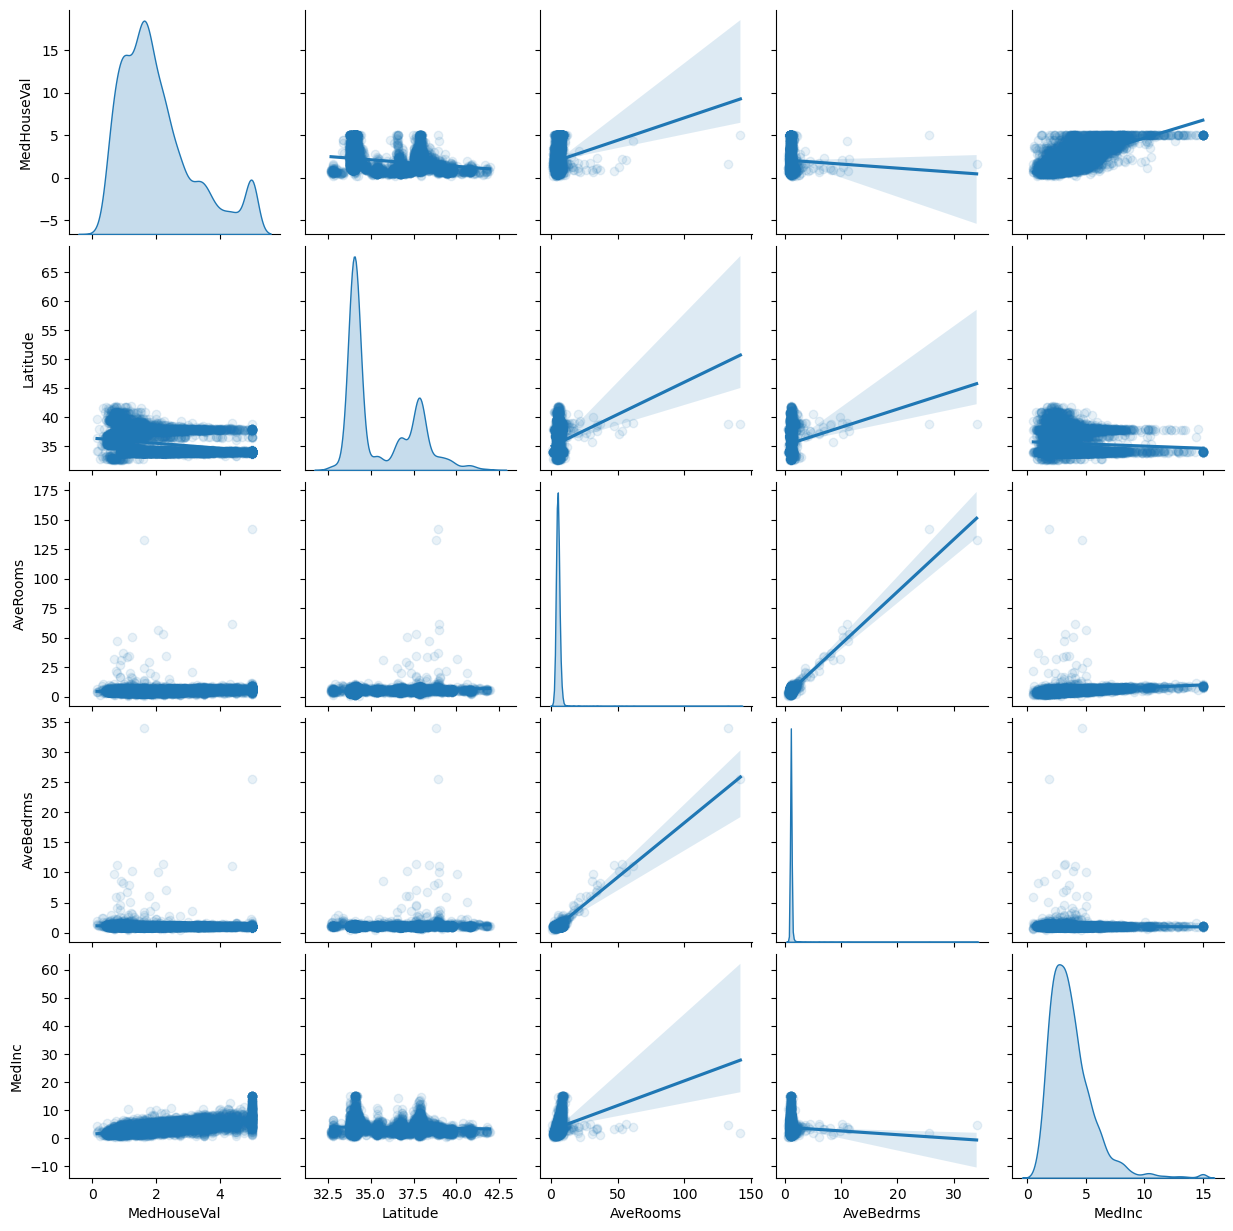

In [30]:
import seaborn as sns
#Imports the Seaborn library, which is used for statistical data visualization (built on top of matplotlib).
train_dataset = X_train.copy()
#Creates a copy of the training features DataFrame (`X_train`) to avoid modifying the original.
train_dataset.insert(0, "MedHouseVal", y_train)
#Inserts the target variable `y_train` as a new column named "MedHouseVal" at the first position (index 0) in `train_dataset`.
_ = sns.pairplot(
    train_dataset[
        ["MedHouseVal", "Latitude", "AveRooms", "AveBedrms", "MedInc"]
    ],
#Creates a Seaborn **pairplot** showing pairwise relationships between the selected columns.
#Includes both scatter plots (for feature vs. feature) and histograms or KDE plots (for individual features).
    kind="reg",
# Adds regression lines to the scatter plots, helping visualize linear relationships between variables.
    diag_kind="kde",
#Uses **Kernel Density Estimate (KDE)** plots for the diagonal subplots (instead of histograms) to show feature distributions.
    plot_kws={"scatter_kws": {"alpha": 0.1}},
#Sets the transparency of scatter plot points to 10% (`alpha=0.1`) for better visibility when points overlap (good for dense datasets).
)


In [34]:
#Linear model regression

#Imports `RidgeCV` from scikit-learn, a **ridge regression model** with built-in cross-validation to select the best regularization parameter (alpha).
from sklearn.linear_model import RidgeCV

model = RidgeCV()
# Creates an instance of the Ridge regression model with default settings.
# Cross-validation will be used internally to choose the optimal alpha (regularization strength).

model.fit(X_train, y_train)
# Fits (trains) the ridge regression model using the training features (`X_train`) and labels (`y_train`).
# During this step, it also selects the best alpha using cross-validation.

print(f"model score on training data: {model.score(X_train, y_train)}")
# Prints the R² score (coefficient of determination) on the **training set**.
# R² indicates how well the model explains the variability of the target variable.
print(f"model score on testing data: {model.score(X_test, y_test)}")
#Prints the R² score on the **testing set**, helping evaluate how well the model generalizes to new/unseen data.

model score on training data: 0.6013466019782059
model score on testing data: 0.5975755037537884


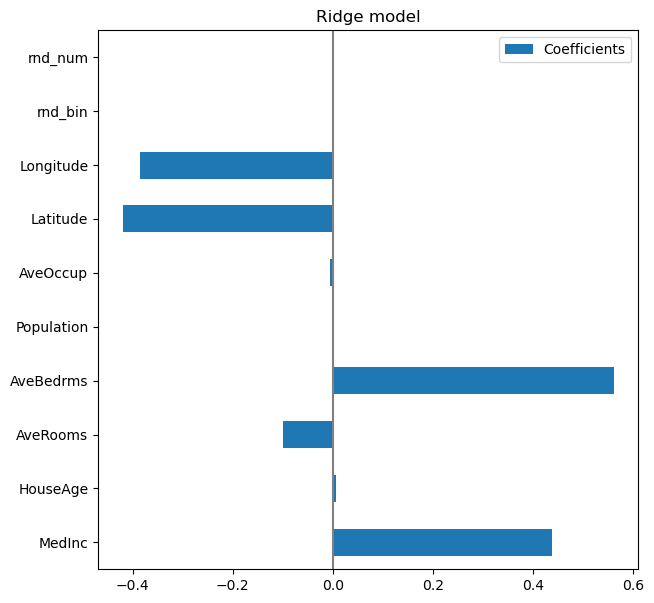

In [36]:
import matplotlib.pyplot as plt
#Imports `matplotlib.pyplot` as `plt` — used for plotting graphs and visualizations.

coefs = pd.DataFrame(
    model.coef_, columns=["Coefficients"], index=X_train.columns
)
#  Converts the trained model's coefficients (`model.coef_`) into a Pandas DataFrame.
#  Each row represents a feature from `X_train`.
# "Coefficients" is the column name showing how much each feature contributes to the prediction.

coefs.plot(kind="barh", figsize=(9, 7))
#  Plots a **horizontal bar chart** of the coefficients.
#  figsize=(9, 7) sets the size of the figure for better readability.
plt.title("Ridge model")
#Sets the title of the plot to "Ridge model".
plt.axvline(x=0, color=".5")
#Draws a **vertical reference line** at x = 0.
#`color=".5"` means a medium gray, used for visual separation between positive and negative coefficients.
plt.subplots_adjust(left=0.3)
#Adjusts the layout of the subplot to add more space on the left (useful if feature names are long).

(0.0, 100.0)

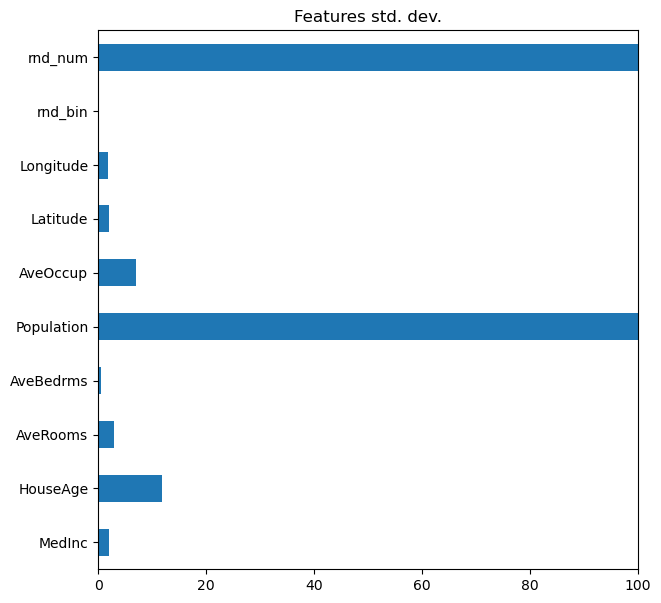

In [42]:
#Scale of co efficient
X_train.std(axis=0).plot(kind="barh", figsize=(9, 7))
#Calculates the **standard deviation** of each feature (column-wise) in `X_train`.
#`axis=0` means compute std dev along each column (i.e., per feature).
# Plots the result as a **horizontal bar chart**.
#`figsize=(9, 7)` sets the size of the plot (width=9, height=7 inches).
plt.title("Features std. dev.")
#Sets the title of the plot to "Features std. dev."
plt.subplots_adjust(left=0.3)
#Adds more space on the left side of the plot — helpful if feature names are long.
plt.xlim((0, 100))
#Sets the x-axis limits from 0 to 100 to zoom in or normalize the view of standard deviations.

In [44]:
from sklearn.pipeline import make_pipeline
# Imports `make_pipeline`, a convenient function to create a machine learning pipeline that chains preprocessing and modeling steps together.
from sklearn.preprocessing import StandardScaler
#Imports `StandardScaler`, a tool that standardizes features by removing the mean and scaling to unit variance (important for many ML models like Ridge).

model = make_pipeline(StandardScaler(), RidgeCV())
# Creates a **pipeline** with two steps:
# StandardScaler() – standardizes input features (important when features have different scales).
# RidgeCV() – applies ridge regression with cross-validation to choose the best regularization strength (alpha).
# Ensures consistent and automatic application of preprocessing during both training and prediction.

model.fit(X_train, y_train)
#Fits the entire pipeline:
#First, standardizes the training features.
#Then trains the RidgeCV regression model using the scaled features and target values.

print(f"model score on training data: {model.score(X_train, y_train)}")
# Calculates and prints the **R² score** on the training set.
# Reflects how well the model fits the training data.

print(f"model score on testing data: {model.score(X_test, y_test)}")
# Calculates and prints the **R² score** on the testing set.
# Indicates how well the model generalizes to unseen data.

model score on training data: 0.601315755610292
model score on testing data: 0.597241071795377


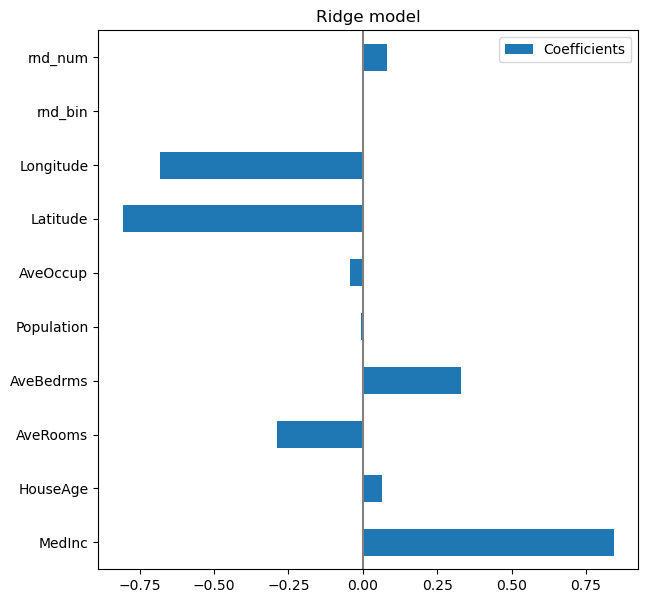

In [46]:
coefs = pd.DataFrame(
    model[1].coef_, columns=["Coefficients"], index=X_train.columns
)
# Creates a Pandas DataFrame called `coefs`:
# `model[1]` accesses the second step in the pipeline — the `RidgeCV` model (first step is `StandardScaler`).
#  `.coef_` extracts the learned coefficients for each feature.
#  `columns=["Coefficients"]` names the column in the DataFrame.
#  `index=X_train.columns` labels each row with the corresponding feature name.
coefs.plot(kind="barh", figsize=(9, 7))
#Plots the coefficients as a **horizontal bar chart**.
# `figsize=(9, 7)` sets the size of the figure for better readability.
plt.title("Ridge model")
#Sets the title of the plot to “Ridge model”.
plt.axvline(x=0, color=".5")
#Draws a **vertical line at x = 0** to visually separate positive and negative coefficients.
#`color=".5"` means a medium gray color (used for subtle emphasis).
plt.subplots_adjust(left=0.3)
# Adds more padding on the left side to prevent feature names from being cut off (especially helpful for long labels).

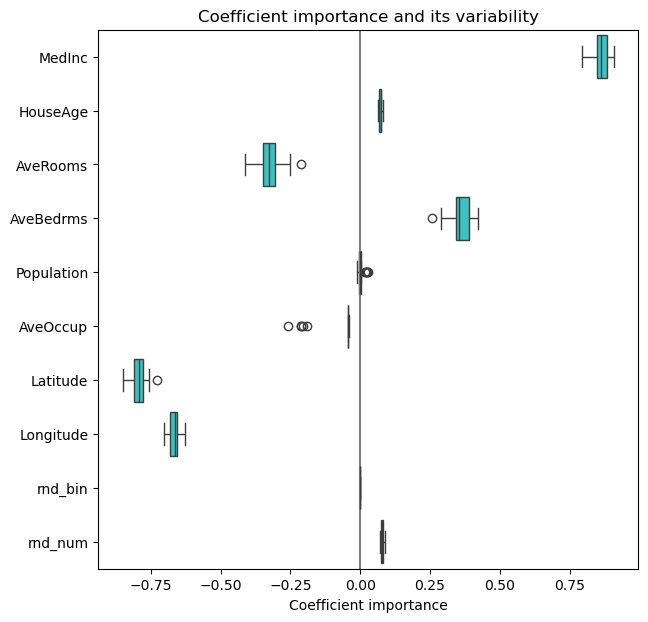

In [48]:
#Checking the variability of the coefficients
from sklearn.model_selection import cross_validate
#Imports `cross_validate`, a function to evaluate a model using cross-validation and return training/test scores and optionally fitted estimators.

from sklearn.model_selection import RepeatedKFold
#Imports `RepeatedKFold`, a cross-validator that performs K-Fold cross-validation multiple times (with different splits).
cv_model = cross_validate(
    model,
    X_with_rnd_feat,
    y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True,
    n_jobs=2,
)
# Performs **cross-validation** with the pipeline model:
#`X_with_rnd_feat`: input features (including random ones).
# `y`: target variable.
# `cv=RepeatedKFold(n_splits=5, n_repeats=5)`: uses 5-fold CV, repeated 5 times (25 total models).
# `return_estimator=True`: returns all fitted models so we can inspect their coefficients later.
# `n_jobs=2`: runs the computation using 2 CPU cores for parallelism (faster execution).

coefs = pd.DataFrame(
    [model[1].coef_ for model in cv_model["estimator"]],
    columns=X_with_rnd_feat.columns,
)
#Extracts the **coefficients** from each RidgeCV model (25 models total):
#`model[1]` accesses RidgeCV from the pipeline.
#Builds a DataFrame where each row = 1 model's coefficients, and columns = features.
# This shows how each feature's importance varies across different CV splits.

plt.figure(figsize=(9, 7))
#Creates a new figure with size (9x7 inches) for the plot.

sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
#Uses Seaborn to create a **horizontal box plot** for each feature’s coefficients:
#Shows the **distribution** and **variability** of feature importance across CV folds.
#`color="cyan"` sets box color.
#`saturation=0.5` makes the color lighter.
plt.axvline(x=0, color=".5")
#Draws a vertical reference line at x = 0 (to easily separate positive/negative coefficients).

plt.xlabel("Coefficient importance")
#Labels the x-axis as "Coefficient importance".

plt.title("Coefficient importance and its variability")
#Adds a title to the plot for context.

plt.subplots_adjust(left=0.3)
#Adds space on the left margin to avoid cutting off long feature names.